In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
df['date'] = pd.to_datetime(df['date'])

<Axes: >

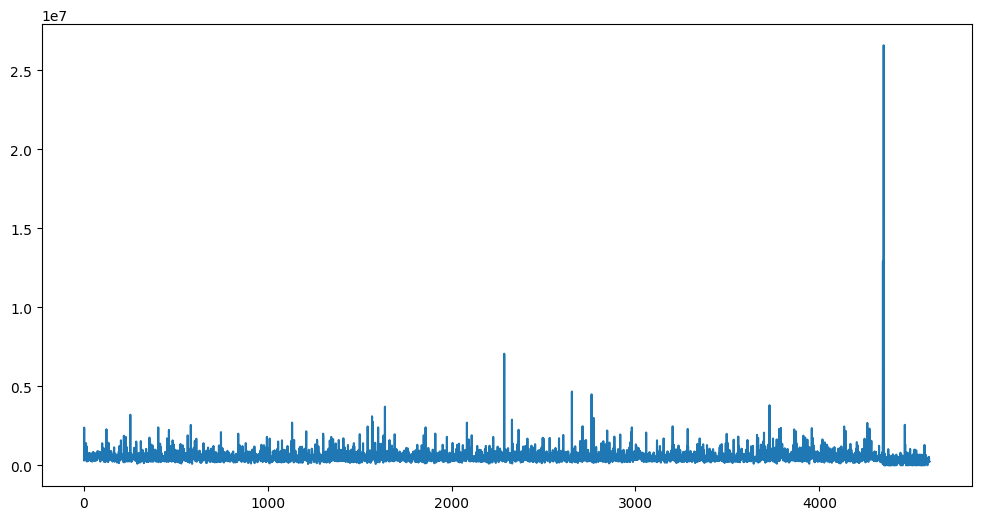

In [ ]:
df['price'].plot(figsize=(12, 6))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If the series is not stationary, apply differencing or other transformations
if result[1] > 0.05:
    df['price_diff'] = df['price'].diff(1)
    df['price_diff'].plot(figsize=(12, 6))

ADF Statistic: -22.542769
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data (assuming you have it in a DataFrame called 'df')
# ...

# Convert 'date' to datetime objects and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

# Select features and target variable
features = ['year', 'month', 'dayofweek']
target = 'price'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a constant term to the features (required for statsmodels)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
# Create and train the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.102
Date:                Wed, 11 Dec 2024   Prob (F-statistic):            0.00613
Time:                        14:26:11   Log-Likelihood:                -52467.
No. Observations:                3680   AIC:                         1.049e+05
Df Residuals:                    3677   BIC:                         1.050e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.448e+05   6207.645     87.771      0.0

In [ ]:
# Create new data for future prediction (only date-based features)
future_date = pd.to_datetime('2025-03-15')  # Example date

future_data = pd.DataFrame({
    'const': [1],  # Constant term
    'year': [future_date.year],
    'month': [future_date.month],
    'dayofweek': [future_date.dayofweek]
},index=[0])

# Make predictions
predicted_prices = results.predict(future_data)
print(predicted_prices)

0    652083.874014
dtype: float64


In [ ]:
# ... (previous code for data preparation, model training) ...

# Create new data for future prediction (only date-based features)
future_date = pd.to_datetime('2025-03-15')  # Example date

future_data = pd.DataFrame({
    'const': [1],  # Constant term
    'year': [future_date.year],
    'month': [future_date.month],
    'dayofweek': [future_date.dayofweek]
},index=[0])


# Make predictions
predicted_price = results.predict(future_data)[0]  # Get the predicted price value

# Print the prediction with a message
print(f"Predicted house price for {future_date.strftime('%Y-%m-%d')}: {predicted_price:,.2f}")

Predicted house price for 2025-03-15: 652,083.87


In [ ]:
# ... (previous code for data preparation, model training) ...

# Create new data for future prediction (only date-based features)
future_date = pd.to_datetime('2025-03-16')  # Example date

future_data = pd.DataFrame({
    'const': [1],  # Constant term
    'year': [future_date.year],
    'month': [future_date.month],
    'dayofweek': [future_date.dayofweek]
},index=[0])


# Make predictions
predicted_price = results.predict(future_data)[0]  # Get the predicted price value

# Print the prediction with a message
print(f"Predicted house price for {future_date.strftime('%Y-%m-%d')}: {predicted_price:,.2f}")

Predicted house price for 2025-03-16: 662,571.11
